# Z-Grouping: Examples

### Submitted to ECML PKDD 2022

In [1]:
from zgrouping import grouping, syntheticGenerator, utils
import matplotlib.pyplot as plt

### 0. Parameter assignments

In [2]:
# SYNTHETIC GENERATOR
# For details, please refer to the supplementary material.
tc = 50
tl = 365
c = 20
no_outliers = 10
outlier_size = 10

# GROUPING GENERATION
n_bins = 5
alpha = 0.9
eta = 1.5

### 1. Create a synthetic dataset using the synthetic dataset generator

In [3]:
X_raw, y = syntheticGenerator.createSyntheticData(tc = tc, tl=tl, c = c, no_outliers = no_outliers, outlier_size=outlier_size)

Example of the synthetic dataset

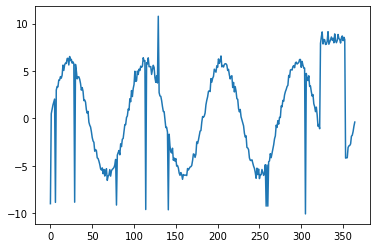

In [4]:
plt.plot(X_raw[0])

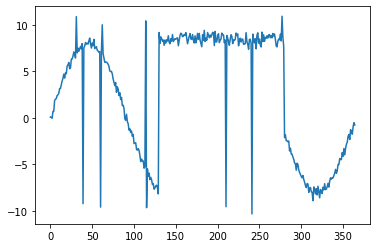

In [5]:
plt.plot(X_raw[150])

### 2. Apply z-normalization on X_raw to create a normalized dataset

In [6]:
X = utils.znorm(X_raw)

### 3. Apply symbolic aggregate approximation to create event sequences
 

In [7]:
X_sax = utils.SAXify(X, n_bins = 5)

Example of the event sequence, a collection of abstracted event labels

In [8]:
X_sax[200]

array([1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

Example of the raw dataset and the abstracted dataset (event sequence)

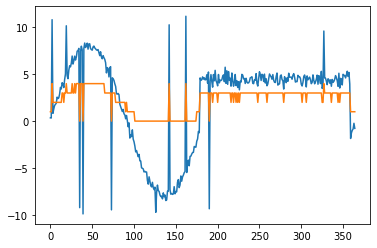

In [9]:
plt.plot(X_raw[200])
plt.plot(X_sax[200])
plt.show()

### 4. Create channels for local gropuing generation

In [10]:
matrices = utils.createChannels(X_sax)

### 5. Create local groupings without global grouping information
- In this case, the algorithm does not perform local grouping validation (Step 4) but returns all local groupings and associations it found.
- Section 6 of this example notebook explains the way including the local grouping validation.

In [11]:
groupings, associations = grouping.createGroupings(matrices, alpha=alpha, accept=False, debug=True)

[DEBUG] BEGIN Local grouping generation
[DEBUG] Generating local grouping candidates from one event label channel - time taken: 15.352091155
[DEBUG] Generating local grouping candidates from one event label channel - time taken: 12.791084257999998
[DEBUG] Generating local grouping candidates from one event label channel - time taken: 10.219818087999997
[DEBUG] Generating local grouping candidates from one event label channel - time taken: 13.228385438000004
[DEBUG] Generating local grouping candidates from one event label channel - time taken: 9.996486611999998
[DEBUG] BEGIN Association generation


An example of the local grouping (members in the time series and its range).

In [12]:
groupings

[{'members': array([False,  True, False, False, False,  True,  True,  True,  True,
          True, False,  True,  True,  True,  True,  True,  True, False,
          True,  True, False,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True, False,
          True,  True,  True,  True, False,  True,  True,  True, False,
         False, False,  True,  True,  True, False, False, False, False,
         False, False, False,  True, False, False,  True,  True, False,
         False,  True, False, False, False,  True,  True,  True, False,
          True, False,  True, False, False, False,  True,  True,  True,
          True, False, False, False,  True, False, False, False, False,
         False, False,  True, False, False, False,  True,  True, False,
         False,  True,  True,  True,  True,  True, False,  True, False,
          True,  True,  True,  True,  True,  True,  True,  True, False,
          True,  True,  True,  True,  True,  True,  T

An example of the association (members in the time series and its range)

In [13]:
len(groupings)

34

In [14]:
len(associations)

30

In [15]:
associations[2]

{'members': array([False,  True, False, False, False, False,  True, False, False,
         True, False,  True,  True,  True,  True, False,  True, False,
         True,  True, False, False,  True, False,  True, False,  True,
         True,  True, False,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True, False, False,  True,  True, False,
        False, False,  True,  True,  True, False, False, False, False,
        False, False, False,  True, False, False,  True, False, False,
        False,  True, False, False, False,  True,  True,  True, False,
        False, False, False, False, False, False, False, False,  True,
         True, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False,  True, False, False,
        False,  True,  True,  True,  True,  True, False,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  T

### 6. Create local groupings with global grouping information - local grouping validation process
- This chapter shows how to run a local grouping generation process with the validity score (Please refer to Step 4 in the paper).
- We can turn this option on by putting the 'accept' option as `True`.
- The example checks whether the tiles have enough class of 0 to accept each local grouping as a valid one.

In [16]:
matrices[0].shape[1]

365

In [17]:
y[0]

0

In [18]:
groupings, associations = grouping.createGroupings(matrices, metas = y, c = y[0], alpha=alpha, eta=eta, accept=True, debug=True)

[DEBUG] BEGIN Local grouping generation
[DEBUG] Generating local grouping candidates from one event label channel - time taken: 9.83516908899999
[DEBUG] Generating local grouping candidates from one event label channel - time taken: 12.762772041000005
[DEBUG] Generating local grouping candidates from one event label channel - time taken: 10.195939471999992
[DEBUG] Generating local grouping candidates from one event label channel - time taken: 13.232100959999997
[DEBUG] Generating local grouping candidates from one event label channel - time taken: 9.978981785999991
[DEBUG] BEGIN Association generation


Now the local gropuings also have an additional information: the classes related to our target global grouping (c).

In [19]:
groupings[0]

{'members': array([False, False, False, False,  True,  True,  True, False,  True,
        False,  True,  True,  True, False, False,  True, False, False,
        False, False,  True,  True,  True, False, False, False,  True,
        False,  True,  True, False,  True,  True, False, False, False,
         True, False, False,  True, False, False,  True,  True, False,
         True, False, False,  True,  True, False, False,  True, False,
        False, False, False, False, False, False,  True, False, False,
        False, False,  True, False, False, False,  True, False, False,
         True, False,  True, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False,  True, False, False,  True,  True,
         True, False, False,  True, False, False,  True,  True, False,
        False, False, False,  True, False,  True, False,  True, False,
         True, False,  True,  True, False, False, False, False,  T